In [317]:
import pandas as pd

In [318]:
df = pd.read_csv("food_orders_new_delhi.csv")
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


In [319]:
df.shape

(1000, 12)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [321]:
df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [322]:
df.columns

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks'],
      dtype='object')

In [323]:
df.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [324]:
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage

Order ID                   0.0
Customer ID                0.0
Restaurant ID              0.0
Order Date and Time        0.0
Delivery Date and Time     0.0
Order Value                0.0
Delivery Fee               0.0
Payment Method             0.0
Discounts and Offers      18.5
Commission Fee             0.0
Payment Processing Fee     0.0
Refunds/Chargebacks        0.0
dtype: float64

In [325]:
df['Discounts and Offers'].value_counts()

Discounts and Offers
10%             233
50 off Promo    201
15% New User    198
5% on App       183
Name: count, dtype: int64

1. Mode Imputation (Most Frequent Value)
2. Fill with "No Discount" (Categorical)
3. Backward or Forward Fill 
4. If discounts vary by Payment Method, fill missing values using the most common discount in each group


In [326]:
# df2 = df.copy()
# df3 = df.copy()
# df4 = df.copy()

In [327]:
df['Discounts and Offers'].fillna(df['Discounts and Offers'].mode()[0],inplace=True)

C:\Users\msi1\AppData\Local\Temp\ipykernel_16440\2276788263.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discounts and Offers'].fillna(df['Discounts and Offers'].mode()[0],inplace=True)


In [328]:
# df2['Discounts and Offers'].fillna(method='ffill', inplace=True)  # Forward fill
# df2['Discounts and Offers'].fillna(method='bfill', inplace=True)  # Backward fill


In [329]:
# df3['Discounts and Offers'].fillna('No Discount', inplace=True)
# df3['Discounts and Offers'].value_counts()


# 10%             233
# 50 off Promo    201
# 15% New User    198
# No Discount     185
# 5% on App       183

In [330]:
#  fill missing values using the most common discount in each group.
# df4['Discounts and Offers'] = df4.groupby('Payment Method')['Discounts and Offers'].transform(lambda x: x.fillna(x.mode()[0]))


In [331]:
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,10%,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,10%,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,10%,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


In [332]:
df.columns

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks'],
      dtype='object')

In [333]:
df.duplicated().sum()

0

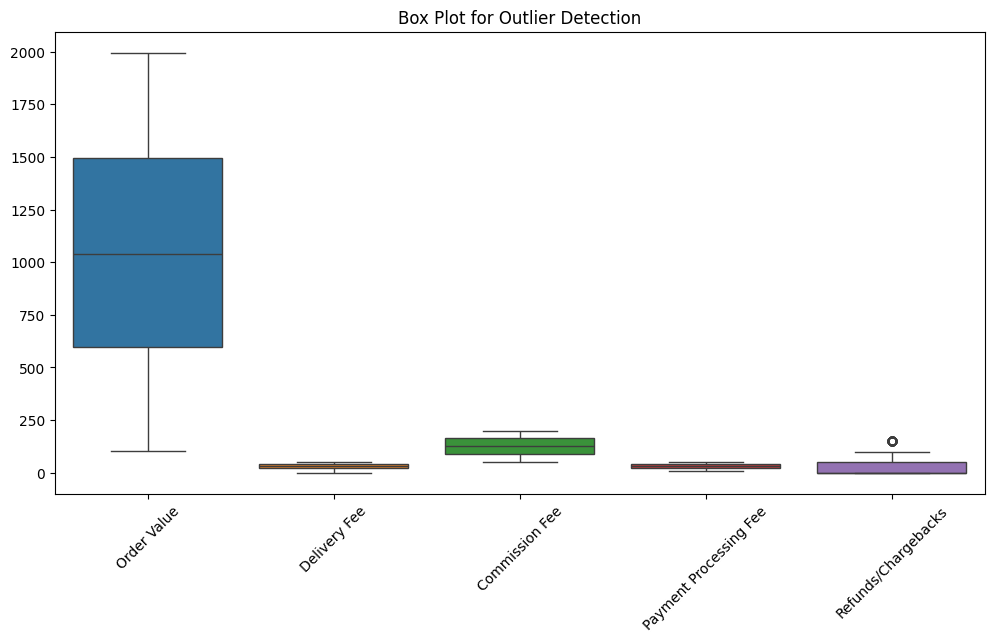

In [334]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Select numerical columns for outlier detection
num_cols = ['Order Value', 'Delivery Fee', 'Commission Fee','Payment Processing Fee','Refunds/Chargebacks']

# Create a boxplot for each column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.title("Box Plot for Outlier Detection")
plt.show()


In [335]:
Q1 = df['Refunds/Chargebacks'].quantile(0.25)
Q3 = df['Refunds/Chargebacks'].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df['Refunds/Chargebacks'] >= Q1 - 1.5 * IQR) & (df['Refunds/Chargebacks'] <= Q3 + 1.5 * IQR)]
print(df_filtered)

     Order ID Customer ID Restaurant ID  Order Date and Time  \
0           1       C8270         R2924  2024-02-01 01:11:52   
1           2       C1860         R2054  2024-02-02 22:11:04   
2           3       C6390         R2870  2024-01-31 05:54:35   
3           4       C6191         R2642  2024-01-16 22:52:49   
4           5       C6734         R2799  2024-01-29 01:19:30   
..        ...         ...           ...                  ...   
995       996       C6232         R2129  2024-01-14 05:57:00   
996       997       C6797         R2742  2024-01-28 08:50:43   
997       998       C5926         R2837  2024-01-21 09:43:19   
998       999       C7016         R2144  2024-01-30 22:23:38   
999      1000       C4335         R2890  2024-01-08 14:46:43   

    Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0      2024-02-01 02:39:52         1914             0       Credit Card   
1      2024-02-02 22:46:04          986            40    Digital Wallet   
2     

In [336]:
df['Refunds/Chargebacks'].describe()

count    1000.000000
mean       28.300000
std        49.614228
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max       150.000000
Name: Refunds/Chargebacks, dtype: float64

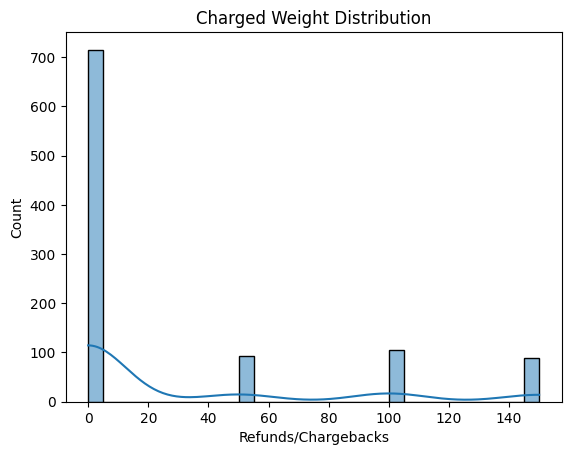

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Refunds/Chargebacks'], bins=30, kde=True)
plt.title("Charged Weight Distribution")
plt.show()

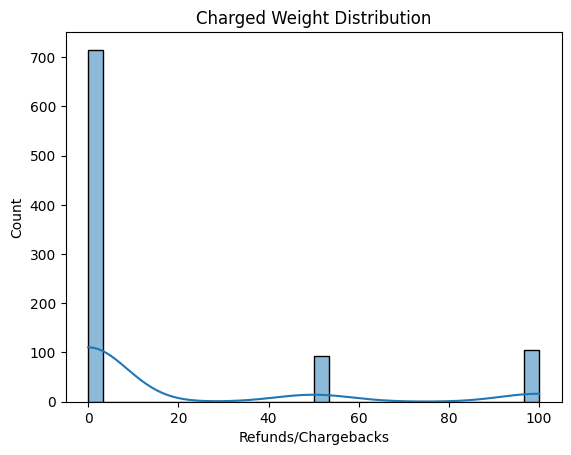

In [338]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_filtered['Refunds/Chargebacks'], bins=30, kde=True)
plt.title("Charged Weight Distribution")
plt.show()

 Outlier Handling Techniques



1. Remove Outliers
2. Instead of removing, cap extreme values at a threshold: 

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR


(data['column'] = data['column'].clip(lower_bound, upper_bound))

3. Transform Data (Log, Square Root, or Box-Cox)
4. Replace Outliers with Median or Mean


In [339]:

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered['Refunds/Chargebacks'] = df_filtered['Refunds/Chargebacks'].clip(lower_bound, upper_bound)


C:\Users\msi1\AppData\Local\Temp\ipykernel_16440\2099829713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Refunds/Chargebacks'] = df_filtered['Refunds/Chargebacks'].clip(lower_bound, upper_bound)


In [340]:
df = df_filtered

In [341]:
print(type(df['Delivery Date and Time'].iloc[0]))
print(type(df['Order Date and Time'].iloc[0]))


<class 'str'>
<class 'str'>


In [342]:
# Delivery Date and Time and Order Date and Time are type objects 

df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])

# df['Delivery Date and Time']


C:\Users\msi1\AppData\Local\Temp\ipykernel_16440\804177919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])
C:\Users\msi1\AppData\Local\Temp\ipykernel_16440\804177919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                912 non-null    int64         
 1   Customer ID             912 non-null    object        
 2   Restaurant ID           912 non-null    object        
 3   Order Date and Time     912 non-null    datetime64[ns]
 4   Delivery Date and Time  912 non-null    datetime64[ns]
 5   Order Value             912 non-null    int64         
 6   Delivery Fee            912 non-null    int64         
 7   Payment Method          912 non-null    object        
 8   Discounts and Offers    912 non-null    object        
 9   Commission Fee          912 non-null    int64         
 10  Payment Processing Fee  912 non-null    int64         
 11  Refunds/Chargebacks     912 non-null    int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory usage:

In [344]:
df['Payment Method'].value_counts()


Payment Method
Cash on Delivery    325
Credit Card         300
Digital Wallet      287
Name: count, dtype: int64

In [345]:
df['Discounts and Offers'].value_counts()

Discounts and Offers
10%             376
50 off Promo    181
15% New User    179
5% on App       176
Name: count, dtype: int64

In [346]:
# Data Cleaning is Done not lets preprocessed data

In [347]:
# Numerical features : continuous and discrete
# Categorical Features : Nominal(without rank)  and  Ordinal(rank) 


# Label Encoding	If there is a meaningful order (e.g., higher discounts are better)
# One-Hot Encoding	If the categories are independent
# Frequency Encoding	If some discounts are much more common
# Feature Engineering	If there are both numbers & text in discounts

In [348]:
data2 = df.copy()
# data3 = df.copy()
# data4 = df.copy()

In [349]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data2['Discounts_Encoded'] = encoder.fit_transform(data2['Discounts and Offers'])

# or 

labels = {'10%':1,'50 off Promo':2, '15% New User':3 ,'5% on App':4}
data2['Discounts_Encoded_Manualy'] = df['Discounts and Offers'].map(labels)



# Target Encoding 

 can be applied to a categorical column, 
 but it is typically used when the column has many unique values (high-cardinality categories)
 and there is a meaningful relationship between the category and the target variable.

 Target Encoding replaces each category with the mean of the target variable.


target_mean = data.groupby('column1')['target column'].mean()

 Replace categories with their mean target value
 
data['name'] = data['column1'].map(target_mean)


In [350]:
# Frequency Encoding (If Offers Are Repetitive)
# Replaces category with how frequent it appears in the dataset.

freq = data2['Discounts and Offers'].value_counts()
data2['Frequency encoding'] = data2['Discounts and Offers'].map(freq)


In [351]:
data2['Frequency encoding'].value_counts()

Frequency encoding
376    376
181    181
179    179
176    176
Name: count, dtype: int64

In [352]:
# One - Hot Encoding - Creates separate columns for each unique discount.
# Best when all discounts are equally important.

# one_hot_encoding = pd.get_dummies(data2 , columns=['Discounts and Offers'])
# one_hot_encoding

one_hot_encoding = pd.get_dummies(data2['Discounts and Offers'])
data_encoded = one_hot_encoding.astype(int)
data2 = pd.concat([data2, data_encoded], axis=1)



In [353]:
one_hot_encoding = pd.get_dummies(df['Discounts and Offers'])
data_encoded = one_hot_encoding.astype(int)
df = pd.concat([df, data_encoded], axis=1)

In [354]:
one_hot_encoding = pd.get_dummies(df['Payment Method'])
data_encoded = one_hot_encoding.astype(int)
df = pd.concat([df, data_encoded], axis=1)

In [355]:
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,10%,15% New User,5% on App,50 off Promo,Cash on Delivery,Credit Card,Digital Wallet
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,0,0,1,0,0,1,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,1,0,0,0,0,0,1
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,0,1,0,0,1,0,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,10%,146,27,0,1,0,0,0,1,0,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,0,0,1,0,0,0,1
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,10%,110,42,0,1,0,0,0,1,0,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,10%,64,31,0,1,0,0,0,1,0,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,0,1,0,0,1,0,0


In [357]:
df['Order Value'].describe()

count     912.000000
mean     1051.750000
std       531.917178
min       104.000000
25%       597.750000
50%      1038.500000
75%      1487.750000
max      1995.000000
Name: Order Value, dtype: float64

In [358]:
df['Order Value'].skew()

-0.00828098581916896

In [359]:
# Min max scaling because we have fixed range on value in order value column and also the skewnedd is also close to 0

In [360]:
df_scaled = df.copy()

In [361]:
# MinMax scaler - scale data range(0,1)

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

df_scaled['Order Value'] = scalar.fit_transform(df_scaled[['Order Value']])


In [362]:
df_scaled

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,10%,15% New User,5% on App,50 off Promo,Cash on Delivery,Credit Card,Digital Wallet
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,0.957166,0,Credit Card,5% on App,150,47,0,0,0,1,0,0,1,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,0.466420,40,Digital Wallet,10%,198,23,0,1,0,0,0,0,0,1
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,0.440508,30,Cash on Delivery,15% New User,195,45,0,0,1,0,0,1,0,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,0.718667,50,Cash on Delivery,10%,146,27,0,1,0,0,0,1,0,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,0.998414,30,Cash on Delivery,50 off Promo,130,50,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,0.381280,0,Digital Wallet,5% on App,165,47,50,0,0,1,0,0,0,1
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,0.805394,50,Cash on Delivery,10%,110,42,0,1,0,0,0,1,0,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,0.237441,20,Cash on Delivery,10%,64,31,0,1,0,0,0,1,0,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,0.692755,0,Cash on Delivery,15% New User,199,34,0,0,1,0,0,1,0,0


In [363]:
df['Delivery Fee'].describe()

count    912.000000
mean      28.563596
std       16.887902
min        0.000000
25%       20.000000
50%       30.000000
75%       40.000000
max       50.000000
Name: Delivery Fee, dtype: float64

In [364]:

df_scaled['Delivery Fee'] = scalar.fit_transform(df_scaled[['Delivery Fee']])

In [365]:
df_scaled

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,10%,15% New User,5% on App,50 off Promo,Cash on Delivery,Credit Card,Digital Wallet
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,0.957166,0.0,Credit Card,5% on App,150,47,0,0,0,1,0,0,1,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,0.466420,0.8,Digital Wallet,10%,198,23,0,1,0,0,0,0,0,1
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,0.440508,0.6,Cash on Delivery,15% New User,195,45,0,0,1,0,0,1,0,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,0.718667,1.0,Cash on Delivery,10%,146,27,0,1,0,0,0,1,0,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,0.998414,0.6,Cash on Delivery,50 off Promo,130,50,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,0.381280,0.0,Digital Wallet,5% on App,165,47,50,0,0,1,0,0,0,1
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,0.805394,1.0,Cash on Delivery,10%,110,42,0,1,0,0,0,1,0,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,0.237441,0.4,Cash on Delivery,10%,64,31,0,1,0,0,0,1,0,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,0.692755,0.0,Cash on Delivery,15% New User,199,34,0,0,1,0,0,1,0,0


In [367]:
df['Commission Fee'].describe()

count    912.000000
mean     126.755482
std       43.011581
min       50.000000
25%       89.000000
50%      127.000000
75%      164.000000
max      200.000000
Name: Commission Fee, dtype: float64

In [368]:
df['Commission Fee'].skew()

-0.02326170172958285

In [370]:
from sklearn.preprocessing import StandardScaler

standard_scala = StandardScaler()
df_scaled['Commission Fee'] = standard_scala.fit_transform(df_scaled[['Commission Fee']])

In [371]:
df_scaled

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,10%,15% New User,5% on App,50 off Promo,Cash on Delivery,Credit Card,Digital Wallet
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,0.957166,0.0,Credit Card,5% on App,0.540721,47,0,0,0,1,0,0,1,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,0.466420,0.8,Digital Wallet,10%,1.657312,23,0,1,0,0,0,0,0,1
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,0.440508,0.6,Cash on Delivery,15% New User,1.587525,45,0,0,1,0,0,1,0,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,0.718667,1.0,Cash on Delivery,10%,0.447672,27,0,1,0,0,0,1,0,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,0.998414,0.6,Cash on Delivery,50 off Promo,0.075475,50,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,0.381280,0.0,Digital Wallet,5% on App,0.889656,47,50,0,0,1,0,0,0,1
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,0.805394,1.0,Cash on Delivery,10%,-0.389771,42,0,1,0,0,0,1,0,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,0.237441,0.4,Cash on Delivery,10%,-1.459837,31,0,1,0,0,0,1,0,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,0.692755,0.0,Cash on Delivery,15% New User,1.680574,34,0,0,1,0,0,1,0,0


In [ ]:
Payment Processing Feedf[''].describe()

count    912.000000
mean      29.834430
std       11.645231
min       10.000000
25%       20.000000
50%       30.000000
75%       40.000000
max       50.000000
Name: Payment Processing Fee, dtype: float64

In [375]:
# mostly 'Payment Processing Fee' is VARIABLE, because different payment methods have different transaction fees.

df_scaled['Payment Processing Fee'] = standard_scala.fit_transform(df_scaled[['Payment Processing Fee']])

In [376]:
df_scaled

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,10%,15% New User,5% on App,50 off Promo,Cash on Delivery,Credit Card,Digital Wallet
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,0.957166,0.0,Credit Card,5% on App,0.540721,1.474852,0,0,0,1,0,0,1,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,0.466420,0.8,Digital Wallet,10%,1.657312,-0.587209,0,1,0,0,0,0,0,1
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,0.440508,0.6,Cash on Delivery,15% New User,1.587525,1.303013,0,0,1,0,0,1,0,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,0.718667,1.0,Cash on Delivery,10%,0.447672,-0.243532,0,1,0,0,0,1,0,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,0.998414,0.6,Cash on Delivery,50 off Promo,0.075475,1.732609,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,0.381280,0.0,Digital Wallet,5% on App,0.889656,1.474852,50,0,0,1,0,0,0,1
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,0.805394,1.0,Cash on Delivery,10%,-0.389771,1.045256,0,1,0,0,0,1,0,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,0.237441,0.4,Cash on Delivery,10%,-1.459837,0.100145,0,1,0,0,0,1,0,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,0.692755,0.0,Cash on Delivery,15% New User,1.680574,0.357902,0,0,1,0,0,1,0,0


In [377]:
df['Refunds/Chargebacks'].value_counts()

Refunds/Chargebacks
0      715
100    105
50      92
Name: count, dtype: int64

In [378]:
df_scaled['Refunds/Chargebacks'] = scalar.fit_transform(df_scaled[['Refunds/Chargebacks']])

In [379]:
df_scaled

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,10%,15% New User,5% on App,50 off Promo,Cash on Delivery,Credit Card,Digital Wallet
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,0.957166,0.0,Credit Card,5% on App,0.540721,1.474852,0.0,0,0,1,0,0,1,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,0.466420,0.8,Digital Wallet,10%,1.657312,-0.587209,0.0,1,0,0,0,0,0,1
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,0.440508,0.6,Cash on Delivery,15% New User,1.587525,1.303013,0.0,0,1,0,0,1,0,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,0.718667,1.0,Cash on Delivery,10%,0.447672,-0.243532,0.0,1,0,0,0,1,0,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,0.998414,0.6,Cash on Delivery,50 off Promo,0.075475,1.732609,0.0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,0.381280,0.0,Digital Wallet,5% on App,0.889656,1.474852,0.5,0,0,1,0,0,0,1
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,0.805394,1.0,Cash on Delivery,10%,-0.389771,1.045256,0.0,1,0,0,0,1,0,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,0.237441,0.4,Cash on Delivery,10%,-1.459837,0.100145,0.0,1,0,0,0,1,0,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,0.692755,0.0,Cash on Delivery,15% New User,1.680574,0.357902,0.0,0,1,0,0,1,0,0
